In [70]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:

options = Options()
options.add_argument('--headless')
driver = webdriver.Chrome(options=options)

driver.get("https://remoteok.com/remote-data-jobs")
time.sleep(3) 

for i in range(6):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

soup = BeautifulSoup(driver.page_source, 'html.parser')
jobs = soup.find_all('tr', class_='job')

job_data = []
for job in jobs:
    try:
        title = job.find('h2', itemprop='title').text.strip()
        company = job.find('h3', itemprop='name').text.strip()
        location_tag = job.find('div', class_='location')
        location = location_tag.text.strip() if location_tag else "Remote"
        tags = [tag.get_text(strip=True) for tag in job.select('td.tags > a')]
        date = job.find('time')['datetime'] if job.find('time') else "N/A"

        job_data.append({
            'Job Title': title,
            'Company': company,
            'Location': location,
            'Tags/Skills': ', '.join(tags),
            'Posted Date': date
        })
    except Exception:
        continue

driver.quit()

df = pd.DataFrame(job_data)
print(f"\n Extracted {len(df)} jobs.")

df.to_csv("remoteok_data_jobs.csv", index=False)




 Extracted 31 jobs.


In [45]:
df=pd.read_csv("remoteok_data_jobs.csv")
df.head()

,Job Title,Company,Location,Tags/Skills,Posted Date
0,Lead Data Engineer,Open Architects,🇺🇸 United States,"Engineer, Developer, DevOps, Python, DataOps",2025-06-02T22:32:54+00:00
1,Brand Designer,Contra,🌏 Worldwide,"Other, Consulting, Design",2025-04-22T19:49:20+00:00
2,Motion Designer,Contra,🌏 Worldwide,"Other, Consulting, Design",2025-04-22T19:43:05+00:00
3,Web Developer,Contra,🌏 Worldwide,"Other, Consulting, Developer",2025-04-22T19:41:39+00:00
4,VP of Engineering,Soda Data,🇪🇺 Europe,"Python, Senior, Engineer",2025-03-11T15:05:28+00:00


In [46]:
def sort_tags(tags):
    if pd.isna(tags) or tags.strip() == '':
        return ''
    tag_list = [tag.strip() for tag in tags.split(',')]
    sorted_tags = ', '.join(sorted(tag_list))
    return sorted_tags

df['Tags/Skills'] = df['Tags/Skills'].apply(sort_tags)

df.head()

,Job Title,Company,Location,Tags/Skills,Posted Date
0,Lead Data Engineer,Open Architects,🇺🇸 United States,"DataOps, DevOps, Developer, Engineer, Python",2025-06-02T22:32:54+00:00
1,Brand Designer,Contra,🌏 Worldwide,"Consulting, Design, Other",2025-04-22T19:49:20+00:00
2,Motion Designer,Contra,🌏 Worldwide,"Consulting, Design, Other",2025-04-22T19:43:05+00:00
3,Web Developer,Contra,🌏 Worldwide,"Consulting, Developer, Other",2025-04-22T19:41:39+00:00
4,VP of Engineering,Soda Data,🇪🇺 Europe,"Engineer, Python, Senior",2025-03-11T15:05:28+00:00


In [47]:
df['Posted Date'] = pd.to_datetime(df['Posted Date']).dt.date.astype(str)
df.head()

,Job Title,Company,Location,Tags/Skills,Posted Date
0,Lead Data Engineer,Open Architects,🇺🇸 United States,"DataOps, DevOps, Developer, Engineer, Python",2025-06-02
1,Brand Designer,Contra,🌏 Worldwide,"Consulting, Design, Other",2025-04-22
2,Motion Designer,Contra,🌏 Worldwide,"Consulting, Design, Other",2025-04-22
3,Web Developer,Contra,🌏 Worldwide,"Consulting, Developer, Other",2025-04-22
4,VP of Engineering,Soda Data,🇪🇺 Europe,"Engineer, Python, Senior",2025-03-11


In [48]:
df.isna().sum()

Job Title      0
Company        0
Location       0
Tags/Skills    0
Posted Date    0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.nunique()

Job Title      27
Company        22
Location        5
Tags/Skills    30
Posted Date    26
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    31 non-null     object
 1   Company      31 non-null     object
 2   Location     31 non-null     object
 3   Tags/Skills  31 non-null     object
 4   Posted Date  31 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [52]:
print(df['Location'].value_counts())
print(df['Tags/Skills'].str.split(', ').explode().value_counts().head(10))
print(df['Posted Date'].value_counts())

Location
🌏 Worldwide         16
🇪🇺 Europe            9
🇯🇵 Japan             3
🇺🇸 United States     2
💃 Latin America      1
Name: count, dtype: int64
Tags/Skills
Developer       13
Engineer        12
Python           8
Backend          8
Senior           7
Other            6
Data Science     5
Consulting       4
AWS              4
SQL              4
Name: count, dtype: int64
Posted Date
2025-04-22    3
2022-10-13    2
2025-04-15    2
2024-01-01    2
2025-06-02    1
2022-05-03    1
2022-06-02    1
2022-06-20    1
2022-06-27    1
2022-07-29    1
2022-07-16    1
2022-10-03    1
2022-09-29    1
2022-10-12    1
2023-05-09    1
2023-04-19    1
2023-05-23    1
2023-07-30    1
2023-08-03    1
2024-01-28    1
2024-02-07    1
2024-10-11    1
2025-03-10    1
2025-04-14    1
2025-03-11    1
2022-04-23    1
Name: count, dtype: int64


In [53]:
df.dtypes

Job Title      object
Company        object
Location       object
Tags/Skills    object
Posted Date    object
dtype: object

In [54]:
df['Posted Date'] = pd.to_datetime(df['Posted Date'], errors='coerce')


<Axes: title={'center': 'Most Frequent Job Titles'}, ylabel='Job Title'>

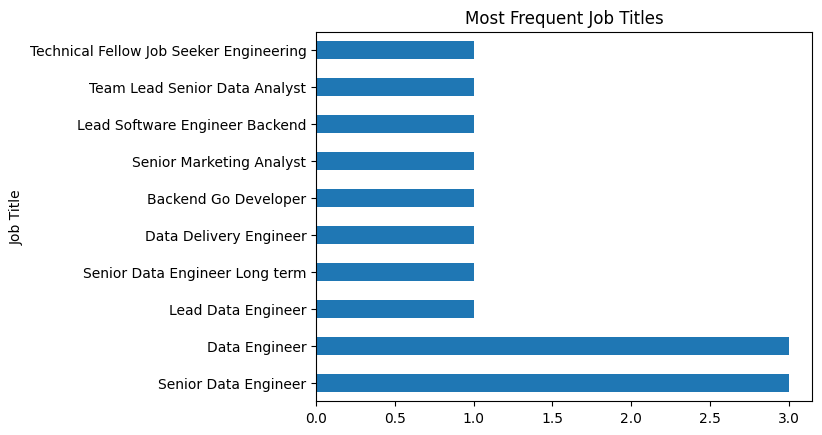

In [58]:
df['Job Title'].value_counts().head(10).plot(kind='barh', title='Most Frequent Job Titles')

<Axes: title={'center': 'Top Hiring Companies'}, ylabel='Company'>

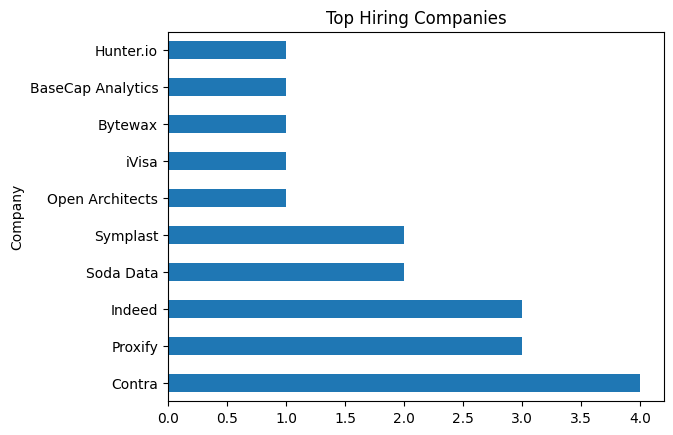

In [56]:
df['Company'].value_counts().head(10).plot(kind='barh', title='Top Hiring Companies')

<Axes: title={'center': 'Top In-Demand Skills'}>

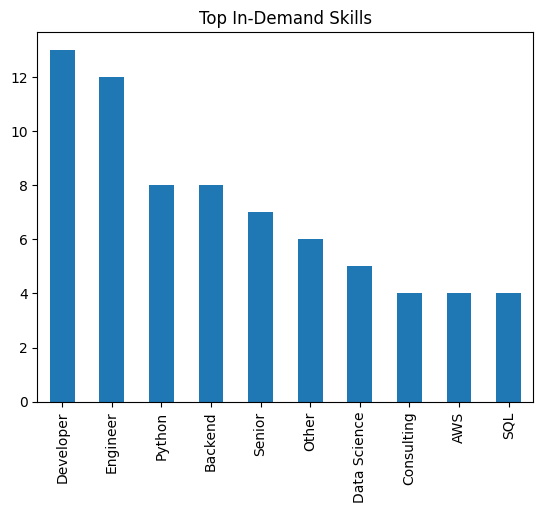

In [61]:
all_tags = sum(df['Tags/Skills'].str.split(', '), [])
Counter(all_tags).most_common(10)
pd.Series(Counter(all_tags)).nlargest(10).plot(kind='bar', title='Top In-Demand Skills')

<Axes: title={'center': 'Jobs Posted Over Time'}, xlabel='Posted Date'>

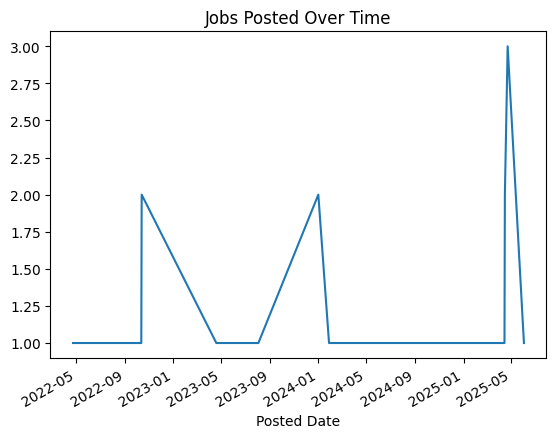

In [62]:
df['Posted Date'].value_counts().sort_index().plot(kind='line', title='Jobs Posted Over Time')

In [65]:
df['Location'] = df['Location'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

<Axes: title={'center': 'Top Locations'}, ylabel='Location'>

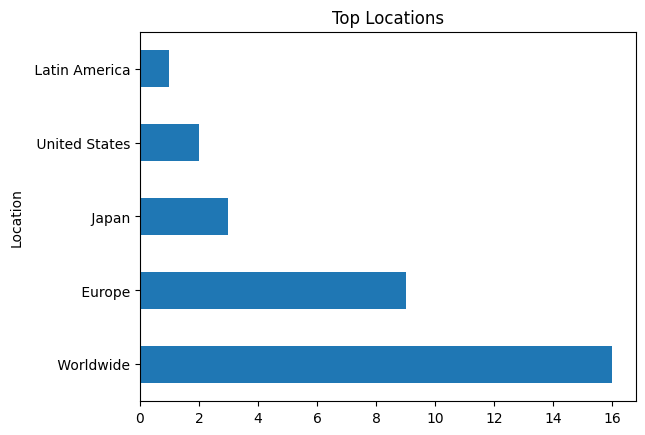

In [66]:
df['Location'].value_counts().head(10).plot(kind='barh', title='Top Locations')


In [99]:
df['Tags/Skills'] = df['Tags/Skills'].fillna('')

def clean_skills(x):
    if isinstance(x, list):
        return ','.join(i.strip() for i in x)
    return ','.join(i.strip() for i in x.split(','))

df['Tags/Skills'] = df['Tags/Skills'].fillna('').apply(clean_skills)

In [100]:
#extract city from location
df['City'] = df['Location'].str.split(',').str[0].str.strip()
#explode skills into separate rows
df_exploded = df.copy()
df_exploded['Tags/Skills'] = df_exploded['Tags/Skills'].str.split(',')
df_exploded = df_exploded.explode('Tags/Skills')

df_exploded['Tags/Skills'] = df_exploded['Tags/Skills'].str.strip()


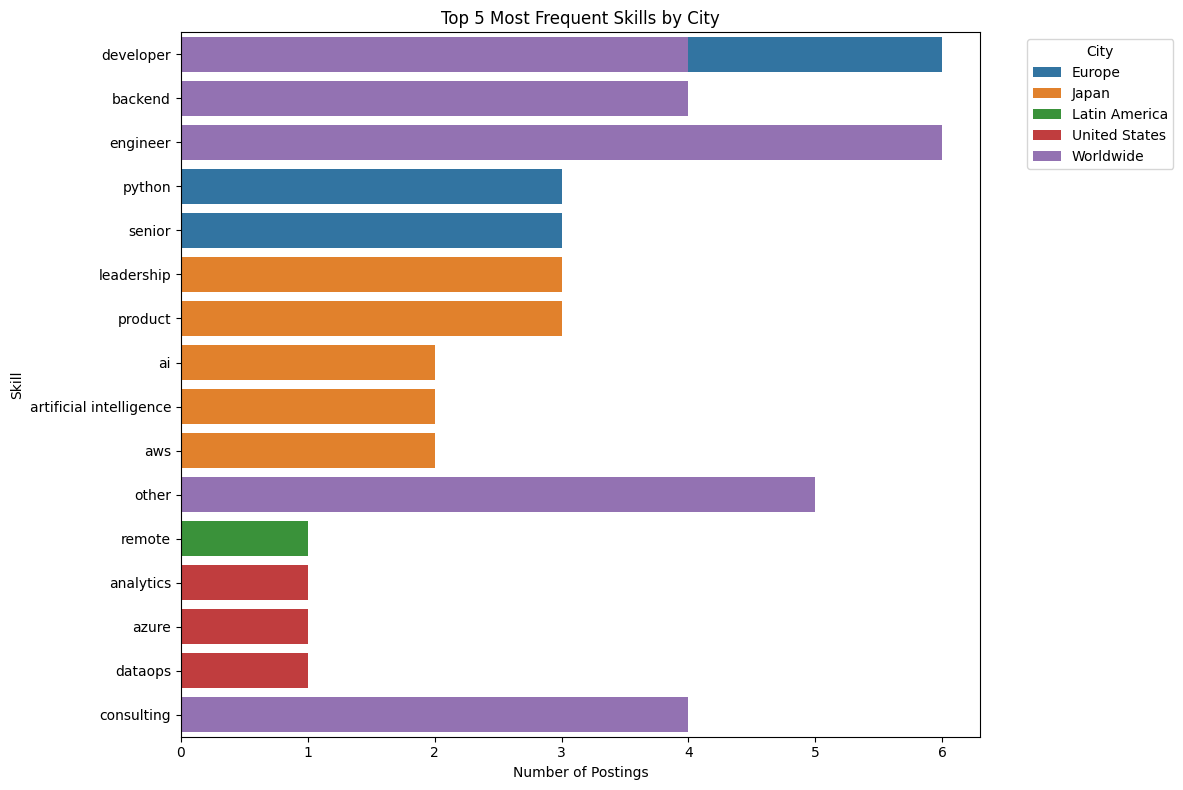

In [101]:
city_skills = (
    df_exploded.groupby(['City', 'Tags/Skills'])
    .size()
    .reset_index(name='Count')
    .sort_values(['City', 'Count'], ascending=[True, False])
)

#top 5 skills per city
top5_per_city = city_skills.groupby('City', group_keys=False).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top5_per_city,
    x='Count',
    y='Tags/Skills',
    hue='City',
    dodge=False
)
plt.title('Top 5 Most Frequent Skills by City')
plt.xlabel('Number of Postings')
plt.ylabel('Skill')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()